In [73]:
import pandas as pd
import numpy as np
import string
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

import matplotlib.pyplot as plt

%matplotlib inline

In [74]:
yelp_biz = pd.read_csv('/Users/dspitzfaden/Galvanize/capstone/data/nevada_biz.csv')
inspection_biz = pd.read_csv('/Users/dspitzfaden/Galvanize/capstone/data/restaurant_establishments.csv', sep=';')

In [75]:
yelp_biz['yelp_address']= yelp_biz['address']

In [76]:
yelp_biz.sort_values('name', axis=0, ascending=True)

,Unnamed: 0,id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,id.1,business_id,category,yelp_address
164,164,42yLya7lhe7TQGz3KEdKAw,#1 Hawaiian Barbecue,Southeast,"5905 S Eastern Ave, Ste 105",Las Vegas,NV,89119.0,36.0820,-115.120,3.5,32,1,42,XOSRcvtaKc_Q5H1SAzN20A,Sandwiches,"5905 S Eastern Ave, Ste 105"
81,81,25Qa4NoliJ75F_6u3nqZhw,24 Hour Fitness - Green Valley,NaN,2893 North Green Valley Pkwy,Henderson,NV,89014.0,36.0741,-115.084,3.5,58,1,25,o9eMRCWt5PkpLDE0gOPtcQ,Restaurants,2893 North Green Valley Pkwy
106,106,33Ryoh0OVhopQ4zv_ITppw,7-Eleven,The Strip,2202 Paradise Rd,Las Vegas,NV,89104.0,36.1449,-115.155,3.0,3,1,33,EsMcGiZaQuG1OOvL9iUFug,Ice Cream & Frozen Yogurt,2202 Paradise Rd
78,78,25ayGzISIb6tCcygUXvVOw,A Problem Solved Maintenance,Spring Valley,NaN,Las Vegas,NV,89147.0,36.1148,-115.278,4.5,24,0,25,o9eMRCWt5PkpLDE0gOPtcQ,Restaurants,NaN
358,358,91q9OoGL7iRaIuvc1gbc9A,A+ Foot Spa,Spring Valley,"5255 S Decatur Blvd, Ste 109",Las Vegas,NV,89118.0,36.0944,-115.208,2.5,14,1,91,1K4qrnfyzKzGgJPBEcJaNQ,Bars,"5255 S Decatur Blvd, Ste 109"
96,96,32JP_C4-Fc-cYWyft8eZBw,AA Hookah and Vapor Store,Northwest,4343 N Rancho Dr,Las Vegas,NV,89130.0,36.2387,-115.233,3.5,22,1,32,EsMcGiZaQuG1OOvL9iUFug,Coffee & Tea,4343 N Rancho Dr
306,306,84Q5VfaWioe7lwcZmi3CNw,ANLV Cab Company,NaN,5010 S Valley View Blvd,Las Vegas,NV,89103.0,36.0985,-115.189,2.0,13,1,84,VSGcuYDV3q-AAZ9ZPq4fBQ,Bars,5010 S Valley View Blvd
221,221,57CbhnkEuJOX0Yqs3WVW8g,AR Financial,Chinatown,3537 S Valley View Blvd,Las Vegas,NV,89102.0,36.1254,-115.190,1.0,3,1,57,l09JfMeQ6ynYs5MCJtrcmQ,French,3537 S Valley View Blvd
305,305,84OaY6g32C6PiRXXd3suuw,ARCO ampm,Spring Valley,7262 S Fort Apache Rd,Las Vegas,NV,89178.0,36.0560,-115.297,2.0,26,1,84,VSGcuYDV3q-AAZ9ZPq4fBQ,Bars,7262 S Fort Apache Rd
37,37,19u98NWikCviLTGK7_ARAQ,Advanced Spine & Posture,Eastside,"3061 S Maryland Pkwy, Ste 201",Las Vegas,NV,89109.0,36.1342,-115.137,4.0,4,1,19,PfOCPjBrlQAnz__NXj9h_w,Bars,"3061 S Maryland Pkwy, Ste 201"


In [77]:
inspection_biz.sort_values('restaurant_name', axis=0, ascending=True)

,permit_number,facility_id,owner_id,PE,restaurant_name,location_name,address,latitude,longitude,city_id,...,nciaa,plan_review,record_status,current_grade,current_demerits,date_current,previous_grade,date_previous,search_text,Unnamed: 21
17749,PR0110047,FA0074079,NaN,1003,#1 HAWAIIAN BARBEQUE,CHINA DRAGON/#1 HAWAIIAN BARBEQUE,5905 S EASTERN Ave 105,36.082011,-115.119644,10,...,Y,NaN,1,A,3.0,2018-02-22 00:00:00,A,2018-02-22 00:00:00,#1 HAWAIIAN BARBEQUE 1 HAWAIIAN BARBEQUE,NaN
12917,PR0023771,FA0010032,NaN,1003,#1 Hawaiian Barbecue,#1 Hawaiian Barbecue,5870 Losee Rd,36.266671,-115.116662,16,...,Y,NaN,1,A,3.0,2017-08-22 00:00:00,A,2017-08-22 00:00:00,#1 Hawaiian Barbecue 1 Hawaiian Barbecue,NaN
9329,PR0017837,FA0008756,NaN,1006,$5 CAFE,AZTEC INN - $5 CAFE,2200 S Las Vegas Blvd,36.145914,-115.156117,10,...,Y,NaN,1,A,3.0,2018-02-20 00:00:00,A,2018-02-20 00:00:00,$5 CAFE 5 CAFE,NaN
13629,PR0097262,FA0066487,NaN,1016,052 Bar,052 RESTAURANT,11261 S Eastern #100,35.987183,-115.101629,7,...,NaN,NaN,1,A,5.0,2018-03-13 00:00:00,A,2017-04-27 00:00:00,052 Bar 052 Bar,NaN
13628,PR0097261,FA0066487,NaN,1003,052 Restaurant,052 RESTAURANT,11261 S Eastern #100,35.987183,-115.101629,7,...,NaN,NaN,1,A,0.0,2018-03-15 00:00:00,A,2018-03-15 00:00:00,052 Restaurant 052 Restaurant,NaN
8285,PR0015611,FA0008340,NaN,1104,100 Academy of Excellence Kitchen,100 Academy of Excellence,2341 Comstock Dr,36.201857,-115.165585,16,...,Y,NaN,1,A,0.0,2018-04-20 00:00:00,A,2018-04-20 00:00:00,100 Academy of Excellence Kitchen 100 Academy ...,NaN
18901,PR0113718,FA0076553,NaN,1003,100 DEGREES HOT POT - DELETED 10/15,100 DEGREES HOT POT - DELETED,5600 SPRING MOUNTAIN Rd B,36.126350,-115.218214,10,...,NaN,NaN,2,A,3.0,2015-04-27 00:00:00,B,2015-04-09 00:00:00,100 DEGREES HOT POT - DELETED 10/15 100 DEGREE...,NaN
20743,PR0118514,FA0080114,NaN,1009,101 MART SNACK BAR,101 MART,1021 CONVENTION CENTER Dr,36.132229,-115.155351,10,...,NaN,NaN,1,A,6.0,2018-01-02 00:00:00,A,2018-01-02 00:00:00,101 MART SNACK BAR 101 MART SNACK BAR,NaN
11412,PR0021447,FA0009482,NaN,1073,168 Market - Bakery,168 Market,3459 S Jones Blvd,36.126624,-115.225780,10,...,Y,NaN,1,A,8.0,2018-03-27 00:00:00,A,2018-03-27 00:00:00,168 Market - Bakery 168 Market Bakery,NaN
11411,PR0021446,FA0009482,NaN,1003,168 Market - Restaurant,168 Market,3459 S Jones Blvd,36.126624,-115.225780,10,...,Y,NaN,1,A,10.0,2018-03-27 00:00:00,A,2018-03-27 00:00:00,168 Market - Restaurant 168 Market Restaurant,NaN


In [78]:
inspection_biz['longitude']= inspection_biz['longitude'].round(3)
inspection_biz['latitude']= inspection_biz['latitude'].round(4)

In [79]:
stripped_yelp_address = []
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
non_dig= '''!()-[]{}abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ;:'"\,<>./?@#$%^&*_~'''

for i in range(len(yelp_biz)):
    name = str(yelp_biz.iloc[i]['yelp_address'])
    no_punct = ""
    for char in name:
        if char not in non_dig:
            no_punct = no_punct + char
#     lat = yelp_biz.iloc[i]['latitude']
#     print(name in inspection_biz['restaurant_name'])
#     print(long in inspection_biz['longitude'])
    stripped_yelp_address.append(no_punct.rstrip().lower())

    
stripped_inspections_address = []
for i in range(len(inspection_biz)):
    name = str(inspection_biz.iloc[i]['address'])
    no_punct = ""
    for char in name:
        if char not in non_dig:
            no_punct = no_punct + char
#     lat = yelp_biz.iloc[i]['latitude']
#     print(name in inspection_biz['restaurant_name'])
#     print(long in inspection_biz['longitude'])
    stripped_inspections_address.append(no_punct.rstrip().lower())
    

    
stripped_yelp_name = []
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
for i in range(len(yelp_biz)):
    name = str(yelp_biz.iloc[i]['name'])
    no_punct = ""
    for char in punctuations:
        if char not in punctuations:
            no_punct = no_punct + char
#     lat = yelp_biz.iloc[i]['latitude']
#     print(name in inspection_biz['restaurant_name'])
#     print(long in inspection_biz['longitude'])
    stripped_yelp_name.append(no_punct.rstrip().lower())

    
stripped_inspections_name = []
for i in range(len(inspection_biz)):
    name = str(inspection_biz.iloc[i]['restaurant_name'])
    no_punct = ""
    for char in name:
        if char not in non_dig:
            no_punct = no_punct + char
#     lat = yelp_biz.iloc[i]['latitude']
#     print(name in inspection_biz['restaurant_name'])
#     print(long in inspection_biz['longitude'])
    stripped_inspections_name.append(no_punct.rstrip().lower())
    
    

    
stripped_inspections_search_text = []
for i in range(len(inspection_biz)):
    name = str(inspection_biz.iloc[i]['search_text'])
    no_punct = ""
    for char in name:
        if char not in punctuations:
            no_punct = no_punct + char
#     lat = yelp_biz.iloc[i]['latitude']
#     print(name in inspection_biz['restaurant_name'])
#     print(long in inspection_biz['longitude'])
    stripped_inspections_search_text.append(no_punct.rstrip().lower())
    


In [80]:
stripped_inspections_search_text

['mcdonalds 3549 d hotel mcdonalds 3549 d hotel',
 'mcdonalds 5551 mcdonalds 5551',
 'mcdonalds 7675 mcdonalds 7675',
 'mcdonalds 2922 mcdonalds 2922',
 'mcdonalds 3153 plaza mcdonalds 3153 plaza',
 'mcdonalds restaurant 31454 mcdonalds restaurant 31454',
 'larrys villa bar  lounge larrys villa bar  lounge',
 'larrys villa snack bar larrys villa snack bar',
 'peppermill lounge peppermill lounge',
 'peppermill restaurant peppermill restaurant',
 'peppermill cook line peppermill cook line',
 'marie callenders restaurant marie callenders restaurant',
 'marie callenders restaurantbakery marie callenders restaurantbakery',
 'bpo lodge 1468 main kitchen bpo lodge 1468 main kitchen',
 'bpo lodge 1468 bar bpo lodge 1468 bar',
 'bpo lodge 1468 service bar bpo lodge 1468 service bar',
 'bootlegger  casa di copa room bootlegger  casa di copa room',
 'bootlegger  casa di copa bar bootlegger  casa di copa bar',
 'bootlegger bistros prep  warewash bootlegger bistros prep  warewash',
 'bootlegger res

In [81]:
yelp_biz['yelp_strip_address'] = stripped_yelp_address

In [82]:
inspection_biz['inspect_strip_address'] = stripped_inspections_address

In [83]:
yelp_biz['yelp_strip_name'] = stripped_yelp_name
inspection_biz['inspect_strip_name'] = stripped_inspections_name

In [84]:
inspection_biz['inspect_strip_search'] = stripped_inspections_search_text

In [85]:
merge_df=yelp_biz.merge(inspection_biz, left_on=['yelp_strip_address'], right_on = ['inspect_strip_address'])

In [86]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6533 entries, 0 to 6532
Data columns (total 44 columns):
Unnamed: 0               6533 non-null int64
id                       6533 non-null object
name                     6533 non-null object
neighborhood             4954 non-null object
address_x                5895 non-null object
city                     6533 non-null object
state                    6533 non-null object
postal_code              6423 non-null float64
latitude_x               6533 non-null float64
longitude_x              6533 non-null float64
stars                    6533 non-null float64
review_count             6533 non-null int64
is_open                  6533 non-null int64
id.1                     6533 non-null int64
business_id              6533 non-null object
category                 6533 non-null object
yelp_address             5895 non-null object
yelp_strip_address       6533 non-null object
yelp_strip_name          6533 non-null object
permit_number      

In [87]:
merge_df[['id','name', 'restaurant_name', 'yelp_address', 'address_y']]

,id,name,restaurant_name,yelp_address,address_y
0,070x611bvBrBqG3ODqe3dg,Bags Belts & Baubles,WYNN BUTCHER SHOP,3131 Las Vegas Blvd S,3131 S Las Vegas Blvd
1,070x611bvBrBqG3ODqe3dg,Bags Belts & Baubles,WYNN WAITER STORAGE,3131 Las Vegas Blvd S,3131 S Las Vegas Blvd
2,070x611bvBrBqG3ODqe3dg,Bags Belts & Baubles,WYNN MASTER PANTRY,3131 Las Vegas Blvd S,3131 S Las Vegas Blvd
3,070x611bvBrBqG3ODqe3dg,Bags Belts & Baubles,WYNN BREAD SHOP,3131 Las Vegas Blvd S,3131 S Las Vegas Blvd
4,070x611bvBrBqG3ODqe3dg,Bags Belts & Baubles,WYNN CONVENTION KITCHEN,3131 Las Vegas Blvd S,3131 S Las Vegas Blvd
5,070x611bvBrBqG3ODqe3dg,Bags Belts & Baubles,WYNN PANTRY 4,3131 Las Vegas Blvd S,3131 S Las Vegas Blvd
6,070x611bvBrBqG3ODqe3dg,Bags Belts & Baubles,WYNN PANTRY 5,3131 Las Vegas Blvd S,3131 S Las Vegas Blvd
7,070x611bvBrBqG3ODqe3dg,Bags Belts & Baubles,WYNN PANTRY 6,3131 Las Vegas Blvd S,3131 S Las Vegas Blvd
8,070x611bvBrBqG3ODqe3dg,Bags Belts & Baubles,WYNN PANTRY 7,3131 Las Vegas Blvd S,3131 S Las Vegas Blvd
9,070x611bvBrBqG3ODqe3dg,Bags Belts & Baubles,WYNN PANTRY 8,3131 Las Vegas Blvd S,3131 S Las Vegas Blvd


In [88]:
def getfuzz(col1, col2, n):
    fuzz_scores=[]
    for i in range(n):
        fuzz_scores.append(fuzz.ratio(str(col1.iloc[i]), str(col2.iloc[i])))
    return fuzz_scores

In [89]:
name_fuzzies= getfuzz(merge_df['name'], merge_df['restaurant_name'], len(merge_df))
address_fuzzies= getfuzz(merge_df['yelp_address'], merge_df['address_y'], len(merge_df))

In [90]:
merge_df['name_fuzz_ratio']= name_fuzzies
merge_df['address_fuzz_ratio'] = address_fuzzies

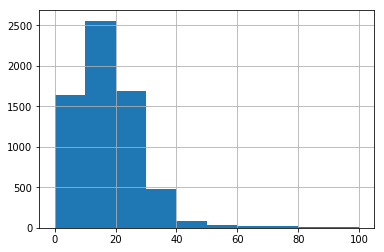

In [91]:
merge_df['name_fuzz_ratio'].hist()

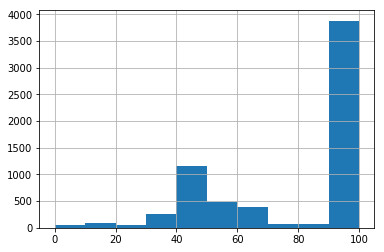

In [92]:
merge_df['address_fuzz_ratio'].hist()

In [101]:
above_thresh = merge_df[(merge_df['name_fuzz_ratio']>= 40)]

In [102]:
above_thresh[['id','name', 'restaurant_name', 'yelp_address', 'address_y', 'name_fuzz_ratio', 'address_fuzz_ratio']].sort_values('name_fuzz_ratio', ascending=False)

,id,name,restaurant_name,yelp_address,address_y,name_fuzz_ratio,address_fuzz_ratio
3330,56Ll9rqG2WxXj4X2pmlkHQ,Sweet Tomatoes,Sweet Tomatoes,2080 N Rainbow Blvd,2080 N Rainbow Blvd,100,100
5418,87YsVbCN_kfzheY79Fzjkg,Pastry Palace,Pastry Palace,4523 W Sahara Ave,4523 W Sahara Ave,100,100
2134,21sGRVR7HEs_t6PdB9tGMw,Angelina's Pizzeria,Angelina's Pizzeria,5750 S Decatur Blvd,5750 S Decatur Blvd,100,100
2410,24f5ie972m_bYpirVW-dZA,Round Table Pizza,Round Table Pizza,9350 W Sahara Ave,9350 W Sahara Ave,100,100
3273,47Ce56CE_NnzdmCozdMQng,La Takiza,La Takiza,3762 E Flamingo Rd,3762 E Flamingo Rd,100,100
6418,97kEmDdAU8YSBz5zw3au7w,KFC,KFC,1410 Horizon Ridge Pkwy,1410 W HORIZON RIDGE Pkwy,100,54
5398,87bozyZ6vtlEDy33Ek_fZw,Grandma Daisy's,Grandma Daisy's Inc,530 Nevada Way,530 Nevada Hwy,88,86
3055,38-sjGYYVcQEKrZe5Nu47A,Johnny Mac's,Johnny Mac's Bar,842 S Boulder Hwy,842 S Boulder Hwy,86,100
3296,54WM5coZonA0izd2y04p_A,Famous Dave's Barbeque,Famous Dave's - Bar,9695 W Flamingo Rd,9695 W Flamingo Rd,83,100
5411,87j14nON0RPB9DSkcWsF7g,Panera Bread,Panera Bread #4080,605 Mall Ring Cir,605 Mall Ring Cir,80,100


In [103]:
len(above_thresh)

166

In [115]:
above_thresh['id'].value_counts()

41Kbugm-qmIQTt7unkALYQ    20
19umlhmVB9O3njIBfRAe8g    19
45zlHi1yyrjpQS_icSi60A     8
41qxBQnPkMZ2ODeACQ1BBg     6
31VgiS9vNXANDagYLnXyfA     5
84D3me3nDXXWDBzT0qcbbA     4
99GGf5xXEuLzXVIaAPL5Ug     3
7e3PZzUpG5FYOTGt3O3ePA     3
86stmK3Vm2f5W6PdyvuLrQ     3
84D7t2d3PNFWr4kCZbQb4g     3
939j88ceB05Te3D7kQPwSA     3
54WM5coZonA0izd2y04p_A     3
91JwvxaCYhLWnAOWp_AmeQ     3
948t6R-3SmAX6L2qTbqEBg     3
31BSLQveLV7eeIoWNxhTaw     3
698nukvxe7mq2Fra5vDikQ     2
19YocUr8tYqPGNr7_K5xzg     2
070x611bvBrBqG3ODqe3dg     2
80Lkm305ZOkQdMEIvOy_lw     2
46UHF46E1z-W2dOmhv-Fng     2
88vF_9_X9dJwZ7w-hwtMow     2
20n09j__6xb7JX0xe9Oo9A     2
4E3nFi3rrmKbqUjG4erKJw     2
98hNRWW4AC5IzEg4BP3f5Q     2
72LIW8U_EfytHYdGHGqPtw     2
55E0-qUHa7Kzqz8rOhbdBQ     2
72HxE_cBs8mQC2ONF22G0g     2
21sUIvjh2Yu9q3DqNAXOKg     2
38-sjGYYVcQEKrZe5Nu47A     2
23FNx7OmXZMv7ZgmzIr8kg     2
                          ..
148d7J-cFejkhYV89y3Jsg     1
861j9brt9NPDNOoC5Z-7jQ     1
38O-fpmF0qFwYBgymUVrow     1
24S-aiManGfjbb

In [114]:
above_thresh[(above_thresh['id']== '41Kbugm-qmIQTt7unkALYQ')][['restaurant_name', 'facility_id']]

,restaurant_name,facility_id
3076,Binion's Fremont West AILR,FA0063305
3077,Binion's Steak House Bar,FA0063305
3078,Binion's Race Book Bar I North,FA0063305
3079,XX_DELETED_Binion's Main Kitchen West,FA0063305
3080,Binion's Racebook Bar II South,FA0063305
3081,Binion's Steak House Ranch,FA0063305
3083,Binion's Cafe,FA0063305
3084,Binion's Coffee Shop Dishroom,FA0063305
3085,Binion's Front Bar,FA0063305
3086,Binion's Coffee Shop Main Kitchen,FA0063305


In [111]:
inspection_biz[inspection_biz['restaurant_name']=="Binion's Fremont West AILR"]

,permit_number,facility_id,owner_id,PE,restaurant_name,location_name,address,latitude,longitude,city_id,...,current_grade,current_demerits,date_current,previous_grade,date_previous,search_text,Unnamed: 21,inspect_strip_address,inspect_strip_name,inspect_strip_search
10887,PR0020603,FA0063305,NaN,1092,Binion's Fremont West AILR,Binions Gambling Hall & Hotel,128 Fremont St,36.1712,-115.144,10,...,NaN,NaN,NaN,NaN,NaN,Binion's Fremont West AILR Binions Fremont Wes...,NaN,128,,binions fremont west ailr binions fremont west...
